<a href="https://colab.research.google.com/github/mopu3263/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_with_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I used google colab platform to execute the project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I saved the csv file in my google drive. Importing csv file from google drive to colab is described here:
 https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Machine Learning with Colab/creditcard.csv'
df = pd.read_csv(path)

In [ ]:
df.shape
df.info()
df.head()
df.describe()
fnf=df["Class"].value_counts()
print(fnf)
print(fnf/len(df))

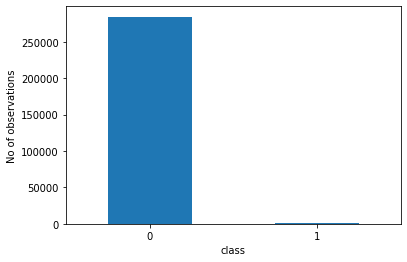

In [5]:
#Data visualization
import seaborn as sns

fnf.plot(kind="bar",xlabel="class",ylabel="No of observations",rot=0)

In [ ]:
#Seaborn polot
f,ax=plt.subplots(1,2,figsize=(18,4))
sns.distplot(df["Time"].values/(60*60),ax=ax[0],color='r')
ax[0].set_title('Distribution of Transaction Time',fontsize=16)
ax[0].set_xlim([min(df["Time"].values/(60*60)),max(df["Time"].values/(60*60))])

sns.distplot(df["Amount"].values,ax=ax[1],color='b')
ax[1].set_title('Distribution of Transaction Amount',fontsize=16)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])
plt.show


In [7]:
#Separate the dataset to Fraud and non-fraud
df_nonfraud=df[df.Class==0]
df_fraud=df[df.Class==1]
print(df_nonfraud)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284315 rows x 31 columns]


In [8]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('-'*30)
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
------------------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
# Import the module
from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

F: 9.033344712018891
p: 0.0026512206498171095


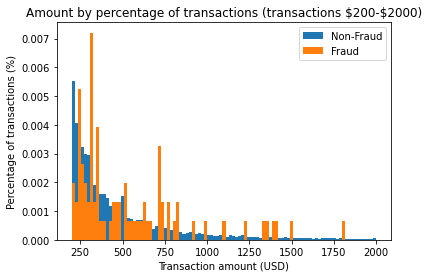

In [10]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

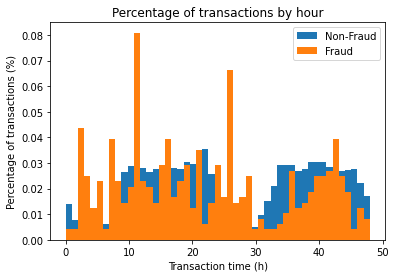

In [11]:
# Plot of high Trasaction time during the day
bins = np.linspace(0, 48)
plt.hist(df_nonfraud.Time/(60*60), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Time/(60*60), bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time (h)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

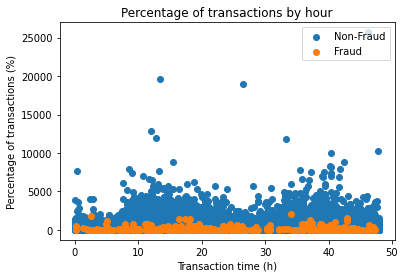

In [12]:
plt.scatter(df_nonfraud.Time/(60*60),df_nonfraud.Amount,label="Non-Fraud")
plt.scatter(df_fraud.Time/(60*60),df_fraud.Amount,label="Fraud")
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time (h)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [13]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler

# **Feature Scaling**
As we know before, features V1-V28 have been transformed by PCA and scaled already. Whereas feature "Time" and "Amount" have not. And considering that we will analyze these two features with other V1-V28, they should better be scaled before we train our model using various algorithms. Here is why and how.
Which scaling mehtod should we use?
The Standard Scaler is not recommended as "Time" and "Amount" features are not normally distributed.
The Min-Max Scaler is also not recommende as there are noticeable outliers in feature "Amount".
The Robust Scaler are robust to outliers: (xi–Q1(x))/( Q3(x)–Q1(x)) (Q1 and Q3 represent 25% and 75% quartiles).
So we choose Robust Scaler to scale these two features.

In [14]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()
#print(df_scaled.shape)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


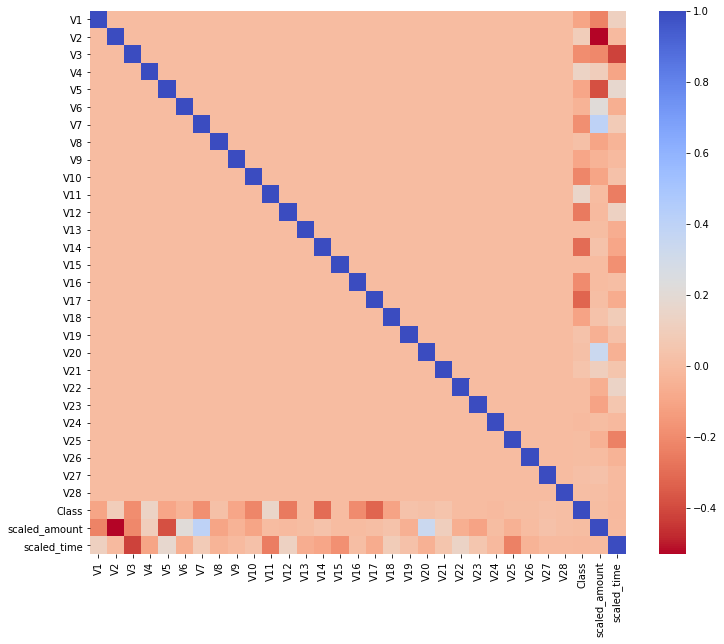

In [15]:
# Calculate pearson correlation coefficience
corr = df_scaled.corr() 
f, ax = plt.subplots(1, 1, figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

# **Features Extraction**

In [ ]:
X = df_scaled.drop(['Class'],axis=1, inplace=False)
X =  np.array(X, dtype="float32")
y=df_scaled[['Class']]
y=np.array(y, dtype="uint8")
print(X)
print(y)
print(X.shape)
print(y.shape)


# **Model Selection with Pipeline**
we will only use logistic regression, DecisionTree and RandomForest for our models to compare.
you can find the details how to use pipeline for workflow here:
https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [18]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
classifiers = [
    LogisticRegression(max_iter=2000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.88      0.15       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

------------------------------
Confusion matrix:
 [[83795  1501]
 [   18   129]]
ROC AUC Score: 0.9581940026057318
------------------------------


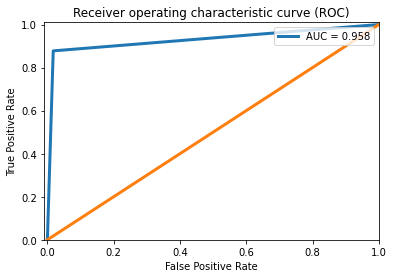

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.57      0.71      0.63       147

    accuracy                           1.00     85443
   macro avg       0.78      0.85      0.81     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------
Confusion matrix:
 [[85216    80]
 [   43   104]]
ROC AUC Score: 0.8532725414307534
------------------------------


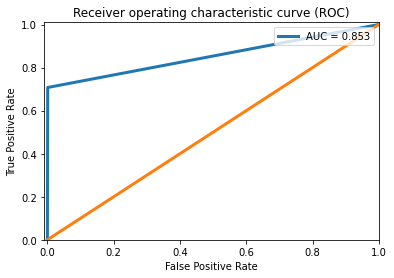

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.80      0.84       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------
Confusion matrix:
 [[85283    13]
 [   30   117]]
ROC AUC Score: 0.9490

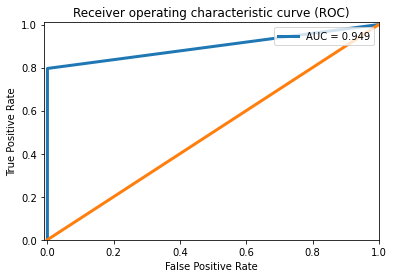

In [19]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('SMOTE', resampling),('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    # Obtain model predictions
    y_predicted = classifier.predict(X_test)
    # Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    print('-'*30)
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))  
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

    # Calculate Area Under the Receiver Operating Characteristic Curve 
    probs = classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    print('ROC AUC Score:',roc_auc)
    print('-'*30)
    # Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

    # Calculate average precision 
    average_precision = average_precision_score(y_test, y_predicted)
    #ROC curve plot 
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1],linewidth=3)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# **Summary Result of three models:**
Logistic regression:  129 out of 147 fraud cases in the test dataset was detected

DecisionTree Classifier :  104 out of 147 fraud cases in the test dataset was detected

RandomForest Classifier: 116 out of 147 fraud cases in the test dataset was detected


# **`TensorFlow Keras Model`**

In this section we will use deep learning model to classify the fraud cases and compare with our previouse three models results



# Prepare the data set

In [ ]:
features=X
targets=np.array(y, dtype="uint8")
print(features)
print(targets)

# Prepare a Validation data set

In [21]:
num_val_samples = int(len(features) * 0.2)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 227846
Number of validation samples: 56961


# Analyze class imbalance in the targets

In [22]:
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]


Number of positive samples in training data: 417 (0.18% of total)


# Normalize the data using training set statistics

In [23]:
mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

# Build a binary classification model

In [24]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
__________________________________________________

# Train the model with class_weight argument

In [25]:
from sklearn.metrics import accuracy_score

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Recall(name="accuracy")
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

train_history=model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

In [27]:
prediction = model.predict_classes(val_features)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
val_targets =  np.array(val_targets, dtype="float32").ravel()
df_ans = pd.DataFrame({'Real Class' :val_targets})
df_ans['Prediction'] = prediction

In [ ]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

In [40]:
Truepositive=df_ans[(df_ans['Real Class']!=0) & (df_ans['Prediction']!=0) ] 
Truepositive.shape

(64, 2)

In [41]:
Falsenegative=df_ans[(df_ans['Real Class']==1) & (df_ans['Prediction']==0) ] 
Falsenegative.shape

(11, 2)

At the end of training, out of 56,961 validation transactions, we are:

1.   correctly identifying 64 of them as fraudulent
2.   missing 11 fraudulent transactions
3.   At the cost of incorrectly flagging 409 legitimate transactions

 
In the real world, one would put an even higher weight on class 1, so as to reflect that False Negatives are more costly than False Positives.

Next time your credit card gets declined in an online purchase -- this is why.